In [1]:
from sklearn.decomposition import PCA
from pylab import *
from skimage import data, io, color
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams["figure.figsize"] = [10, 6]
plt.rcParams["figure.dpi"] = 100

In [3]:
link = "images/5186.jpg"
img_gray = io.imread(link,as_grey=True)

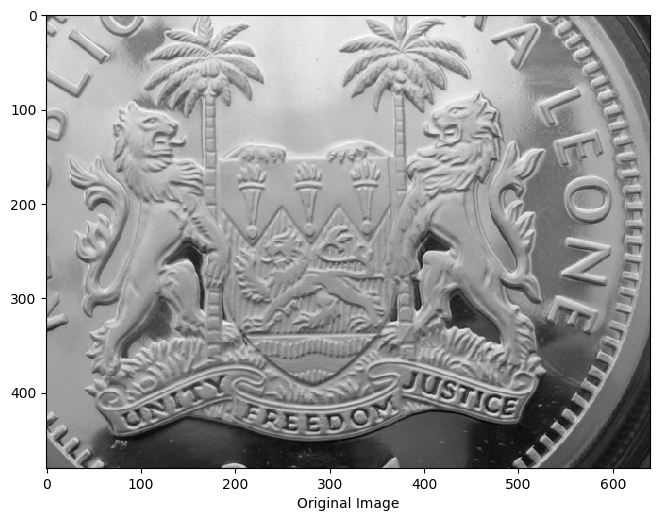

In [5]:
plt.xlabel('Original Image')
plt.imshow(img_gray, cmap='gray')
plt.show()

In [6]:
img_gray.shape # (rows, columns)

(480, 640)

We can think about this image as a matrix of 640 vectors, each of which contains 480 values.

In [7]:
# List of number of principal components we're going to try
n_comp = [128, 64, 32, 16, 8, 4]

----
pc shape: 480 x 128
128 principal components
Variance retained 99.15%
Compression Ratio 20.00%


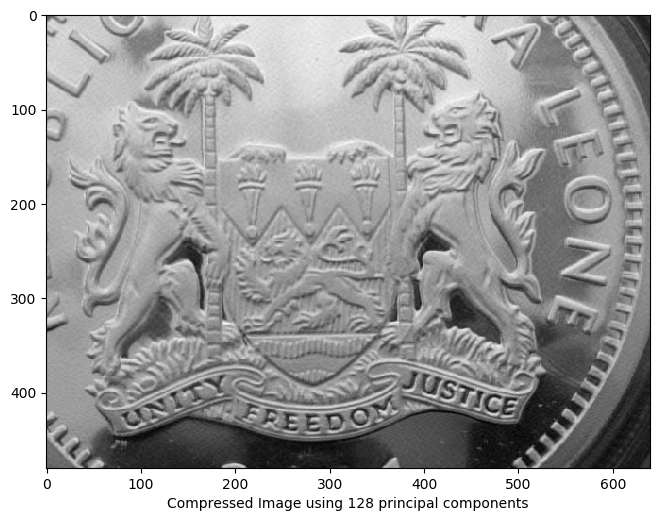

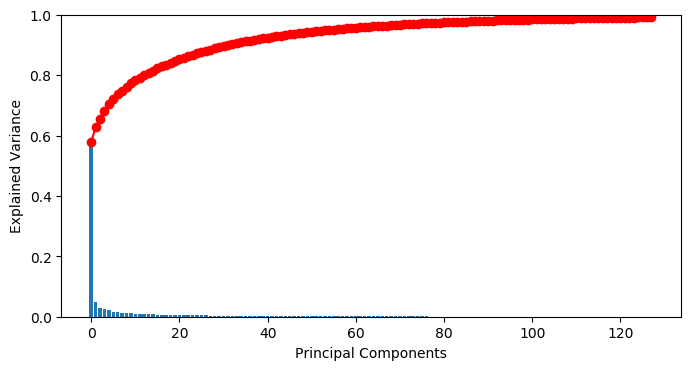

----
pc shape: 480 x 64
64 principal components
Variance retained 96.00%
Compression Ratio 10.00%


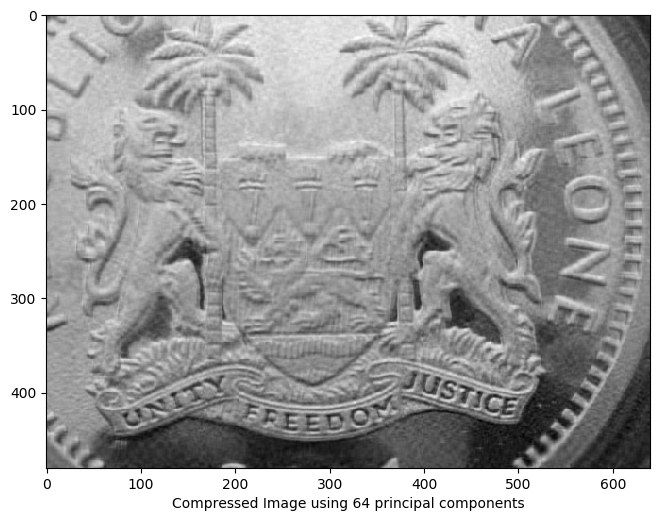

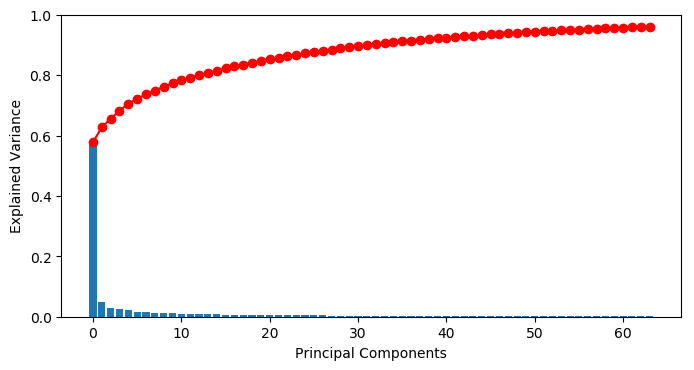

----
pc shape: 480 x 32
32 principal components
Variance retained 89.91%
Compression Ratio 5.00%


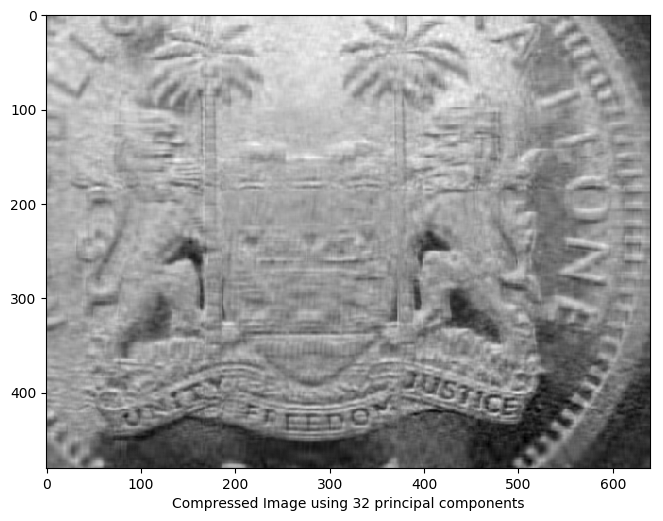

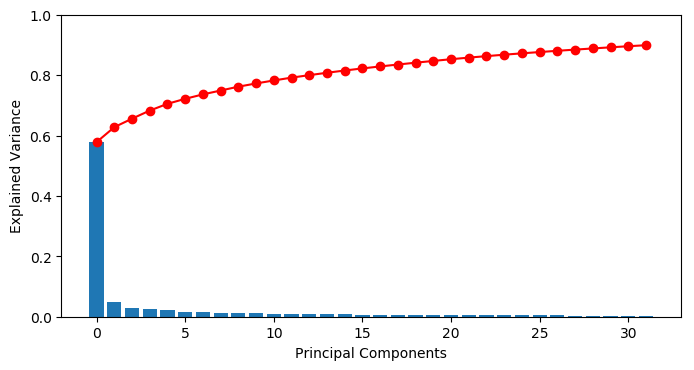

----
pc shape: 480 x 16
16 principal components
Variance retained 82.22%
Compression Ratio 2.50%


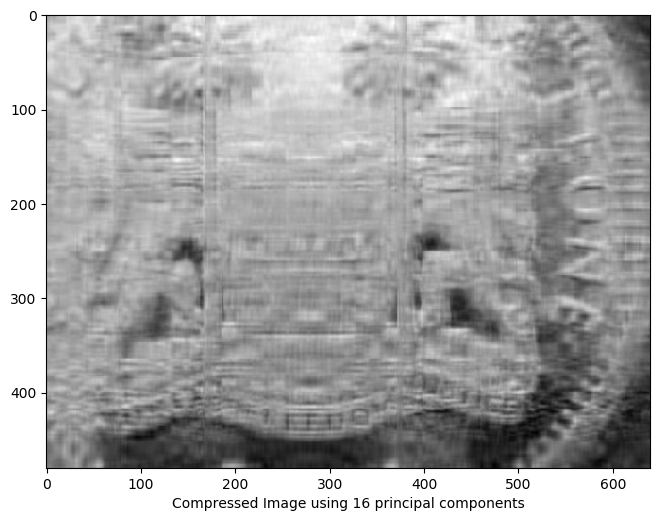

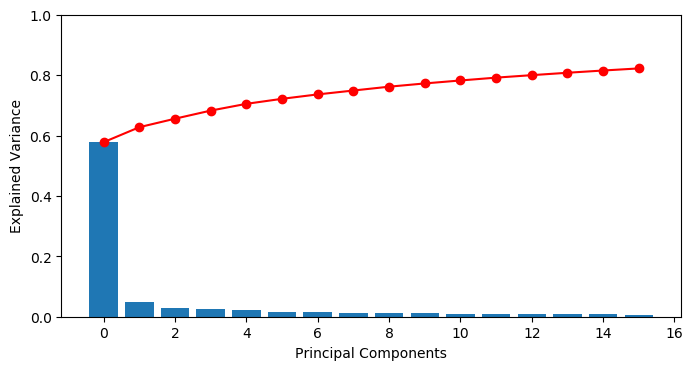

----
pc shape: 480 x 8
8 principal components
Variance retained 74.90%
Compression Ratio 1.25%


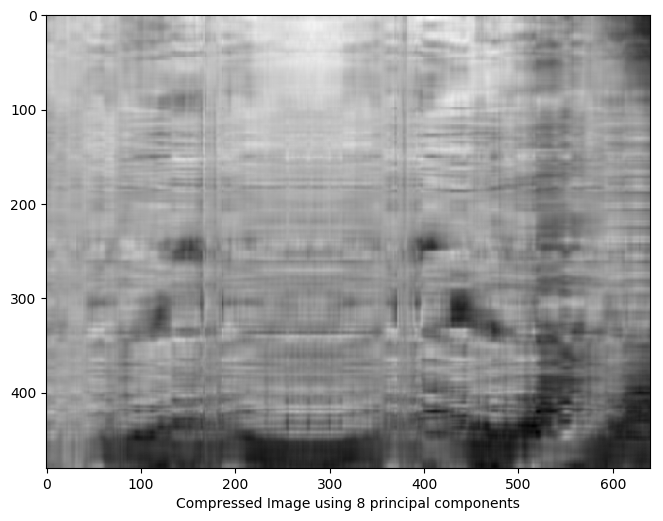

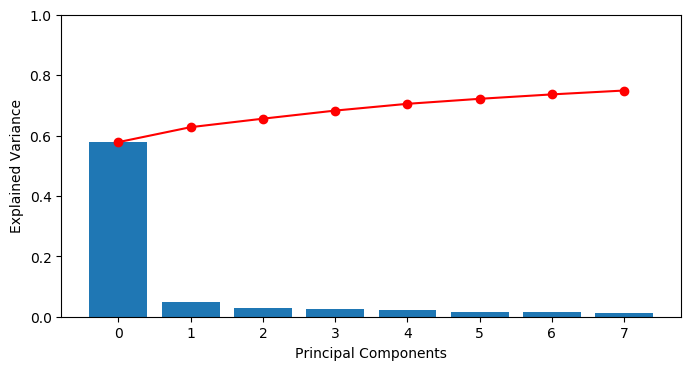

----
pc shape: 480 x 4
4 principal components
Variance retained 68.26%
Compression Ratio 0.62%


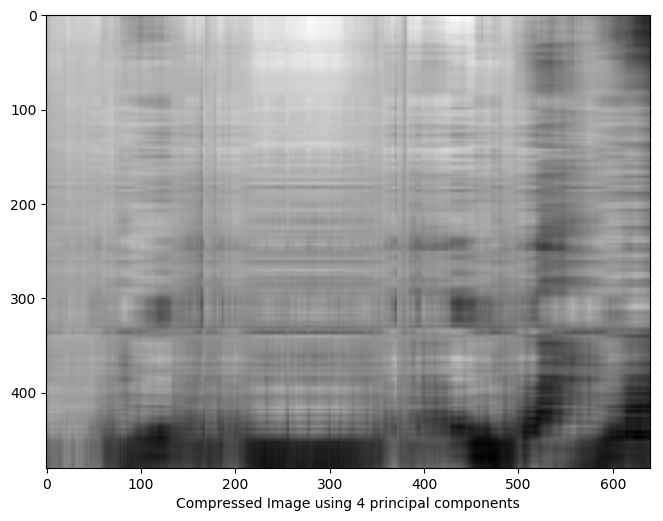

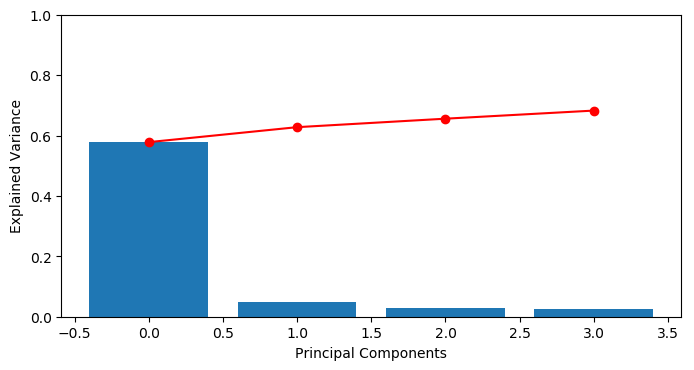

In [8]:
for i in range(len(n_comp)):
    pca = PCA(n_components = n_comp[i])
    pca.fit(img_gray)
    img_gray_pca = pca.fit_transform(img_gray)
    img_gray_restored = pca.inverse_transform(img_gray_pca)
    print('----')
    print('pc shape: %d x %d' % img_gray_pca.shape)
    print('%d principal components' % (n_comp[i]))
    print('Variance retained %.2f%%' % (sum(pca.explained_variance_ratio_) * 100))
    print('Compression Ratio %.2f%%' % (float(size(img_gray_pca)) / size(img_gray) * 100))
    xlabel('Compressed Image using %d principal components' % n_comp[i])
    show(plt.imshow(img_gray_restored, cmap='gray'))

    plt.figure(2, figsize=(8,4), dpi=100)
    xlab = ['PC %s' % j for j in list(range(0, n_comp[i]))]
    x = list(range(0, n_comp[i]))
    y = pca.explained_variance_ratio_
    ycum = y.cumsum()
    #print(x, y)
    plt.bar(x, y)
    plt.plot(x, ycum, c='red', marker='o')
    plt.axis(ymin=0, ymax=1)
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance')
    plt.show()